In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image.shape

(808L, 766L, 3L)

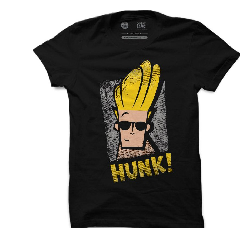

In [8]:
plt.figure()
plt.axis("off")
plt.imshow(image)

In [9]:
image.shape

(808L, 766L, 3L)

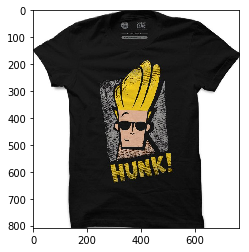

In [10]:
plt.figure()
plt.axis("on")
plt.imshow(image)

In [11]:
image = image.reshape((image.shape[0] * image.shape[1], 3))
print image
print image.shape

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ..., 
 [255 255 255]
 [255 255 255]
 [255 255 255]]
(618928L, 3L)


In [12]:
from sklearn.cluster import KMeans
K = 3
clf = KMeans(n_clusters=K)
clf.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
#initialising the label dictionary
label = [0, 0, 0]

#finding count of data in each cluster
for x in clf.labels_:
    label[x] += 1

#Total Number of data points
label_sum = image.shape[0]

#converting to percentage
label = [float(x) / label_sum for x in label]
print label


[0.5926585967996277, 0.3133773233720239, 0.09396407982834837]


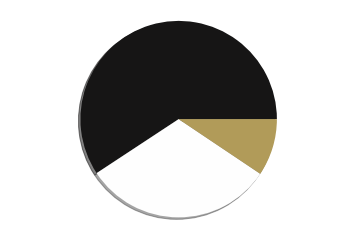

In [16]:
import webcolors

centroids = [x.astype("uint8").tolist() for x in clf.cluster_centers_]

clr = [webcolors.rgb_to_hex(c) for c in centroids]

plt.pie(label, colors=clr, shadow=True) 
plt.axis('equal')
plt.show()